In [2]:
import os
import numpy as np
from typing import List
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, fixed

In [2]:
# Data source:
# https://brain-development.org/ixi-dataset/

3. Open a pair of T1-w and T2-w images (the first six characters of the filename identifies a unique subject).

In [3]:
input_dir = "/home/nbaranov/projects/04_cv/MedicalImageAnalysis/data/small_data/small/"

t1_image = nib.load(os.path.join(input_dir, "t1/IXI102-HH-1416-T1_fcm.nii.gz"))
t1_image_data = t1_image.get_fdata()

t2_image = nib.load(os.path.join(input_dir, "t2/IXI102-HH-1416-T2_reg_fcm.nii.gz"))
t2_image_data = t2_image.get_fdata()

In [4]:
t1_image_data.shape, t1_image_data.shape

((120, 120, 90), (120, 120, 90))

4. Plot a slice of the 3D image volume to the screen from both images and verify that the anatomy approximately aligns.

In [6]:
def show_slices(slices: List) -> None:
    """
    Display T1-w and T2-w slices
    """
    fig, axes = plt.subplots(1, len(slices))
    for i, s in enumerate(slices):
        axes[i].imshow(s, cmap="gray", origin="lower")
    return None

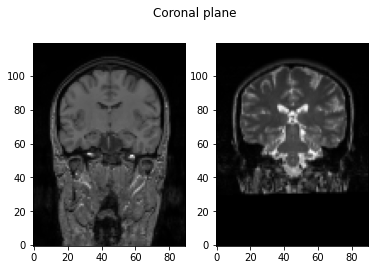

In [7]:
slice_0 = t1_image_data[60, :, :]
slice_1 = t2_image_data[70, :, :]
show_slices([slice_0, slice_1])
plt.suptitle("Coronal plane");

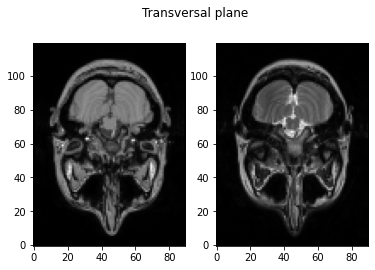

In [8]:
slice_0 = t1_image_data[:, 50, :]
slice_1 = t2_image_data[:, 50, :]
show_slices([slice_0, slice_1])
plt.suptitle("Transversal plane");

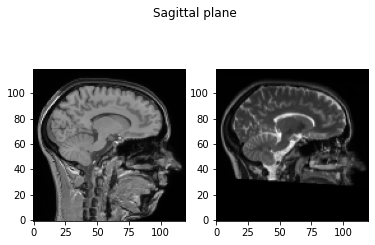

In [9]:
slice_0 = np.rot90(t1_image_data[:, :, 50], 3)
slice_1 = np.rot90(t2_image_data[:, :, 50], 3)
show_slices([slice_0, slice_1])
plt.suptitle("Sagittal plane");

Hmmm...something wrong with T2-w images

In [10]:
def explore_3dimage(slices, layer: int, axis: str):
    """
    Interactive vizualization of MRI slices
    """
    
    plt.figure(figsize=(10, 6))

    if axis == "sagittal":  
        plt.imshow(np.rot90(slices[:, :, layer], 3), cmap='gray', origin="lower")
        plt.title('sagittal plane', fontsize=20);
    if axis == "transversal":
        plt.imshow(slices[:, layer, :], cmap='gray', origin="lower")
        plt.title('transversal plane', fontsize=20);
    if axis == "coronal":
        plt.imshow(slices[layer, :, :], cmap='gray', origin="lower")
        plt.title('coronal plane', fontsize=20);
    plt.axis('off')
    
    return layer

In [11]:
# T1-w
interact(explore_3dimage, slices=fixed(t1_image_data), 
         layer=(0, t1_image_data.shape[2] - 1), 
         axis=["sagittal", "transversal", "coronal"]);

interactive(children=(IntSlider(value=44, description='layer', max=89), Dropdown(description='axis', options=(…

In [12]:
# T2-w
interact(explore_3dimage, slices=fixed(t2_image_data), 
         layer=(0, t2_image_data.shape[2] - 1), 
         axis=["sagittal", "transversal", "coronal"]);

interactive(children=(IntSlider(value=44, description='layer', max=89), Dropdown(description='axis', options=(…